In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-india/House Price India.csv


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("/kaggle/input/house-prices-india/House Price India.csv")
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14619.0,6.762821e+09,6237.161975,6.762810e+09,6.762815e+09,6.762821e+09,6.762826e+09,6.762832e+09
Date,14619.0,4.260455e+04,67.343747,4.249100e+04,4.254600e+04,4.260000e+04,4.266200e+04,4.273400e+04
number of bedrooms,14619.0,3.379233e+00,0.938655,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
number of bathrooms,14619.0,2.129557e+00,0.769955,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living area,14619.0,2.098157e+03,928.218740,3.700000e+02,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
lot area,14619.0,1.509369e+04,37920.885355,5.200000e+02,5.010500e+03,7.620000e+03,1.080000e+04,1.074218e+06
number of floors,14619.0,1.502326e+00,0.540241,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront present,14619.0,7.661263e-03,0.087196,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
number of views,14619.0,2.328477e-01,0.765651,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition of the house,14619.0,3.430399e+00,0.664047,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Duplicates: {df.duplicated().sum()}") 
print(f"missing data: {sum(df.isna().sum())}")


Rows: 14619, Columns: 23
Duplicates: 0
missing data: 0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


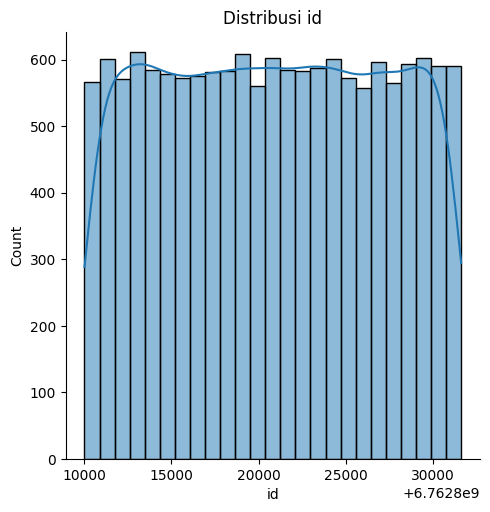

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


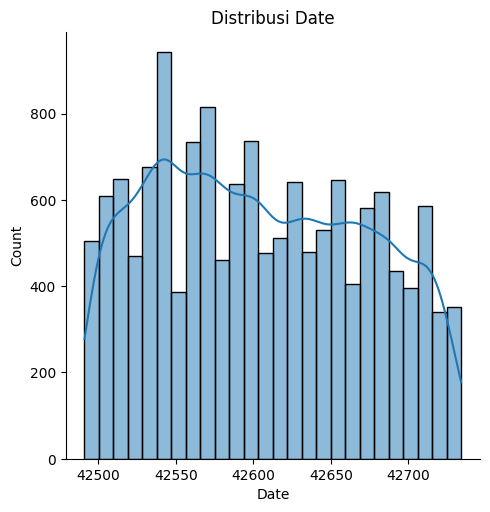

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


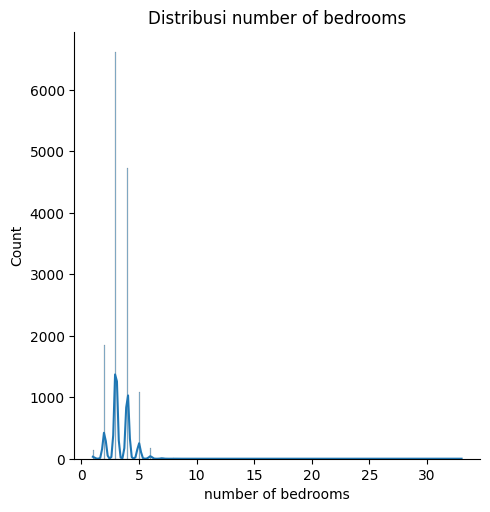

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


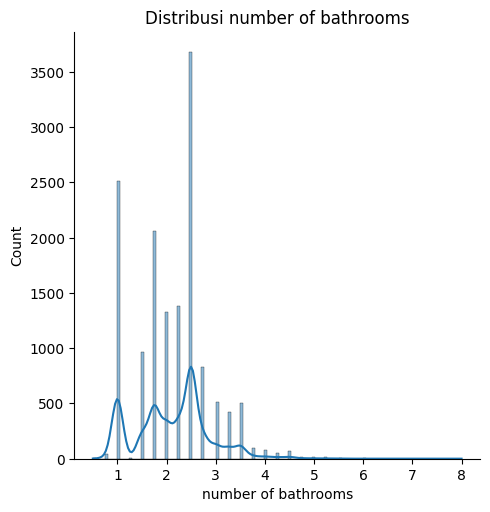

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


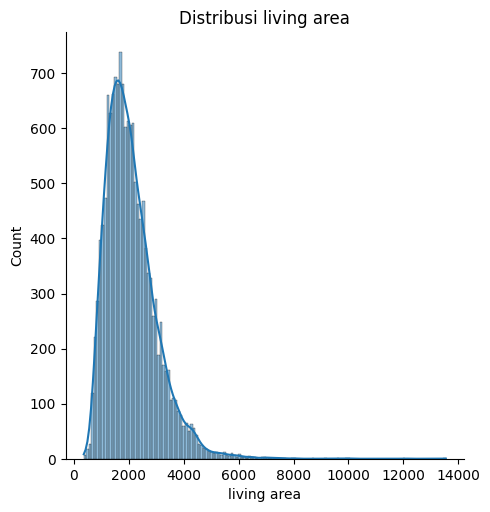

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


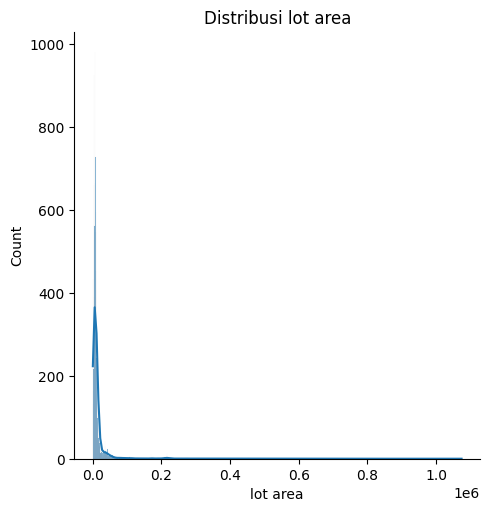

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


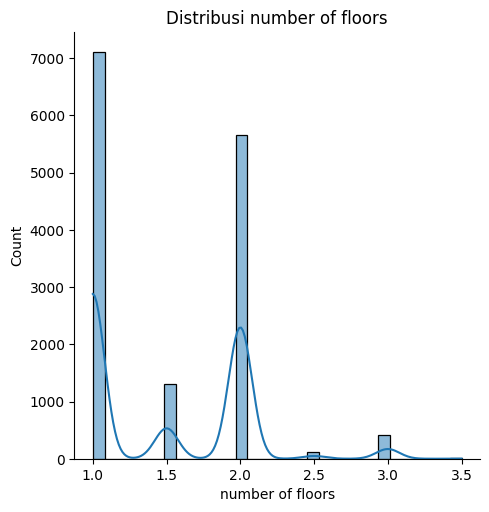

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


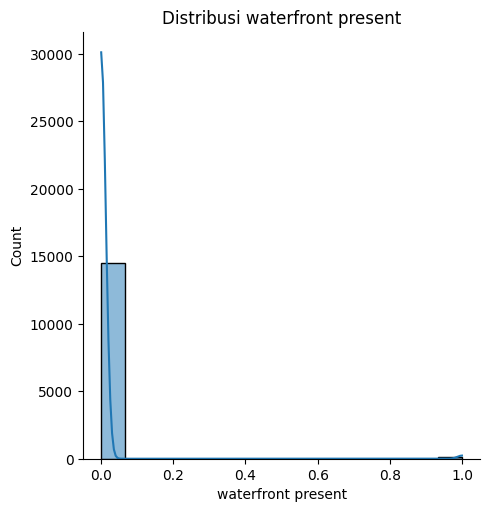

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


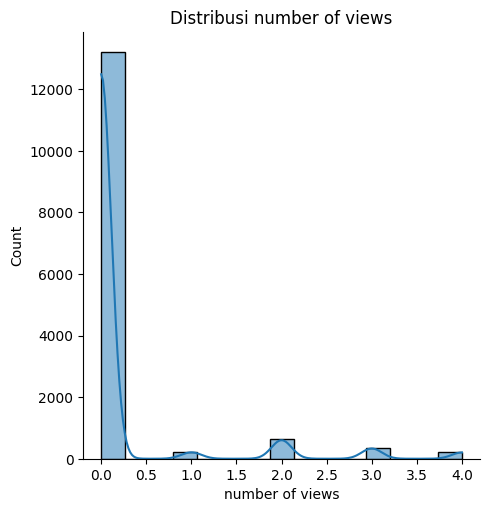

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


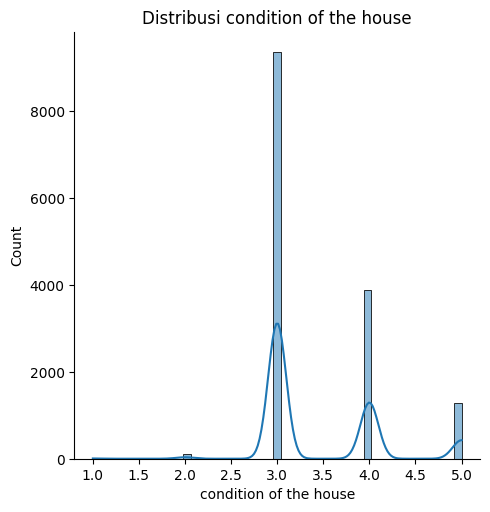

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


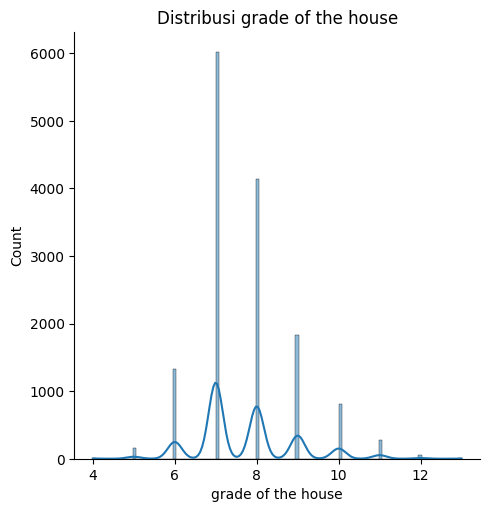

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


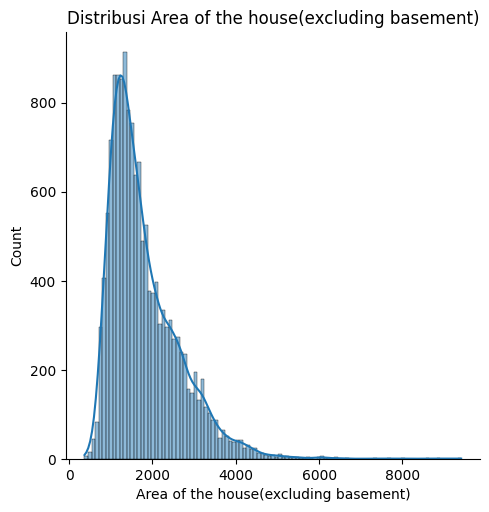

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


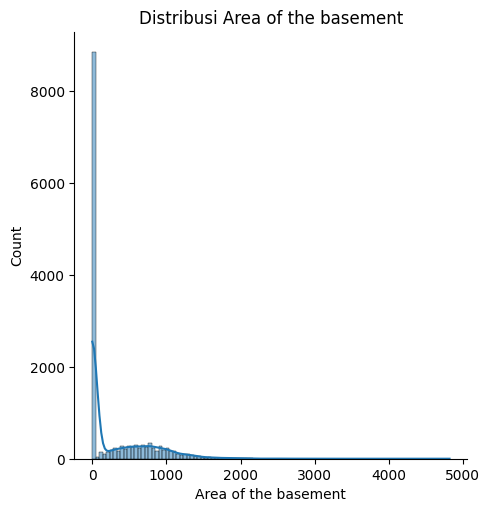

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


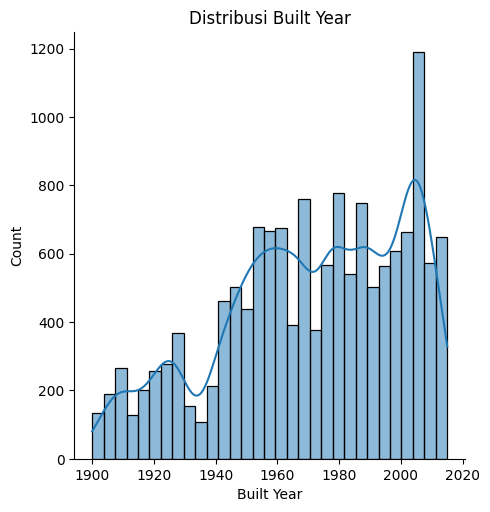

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


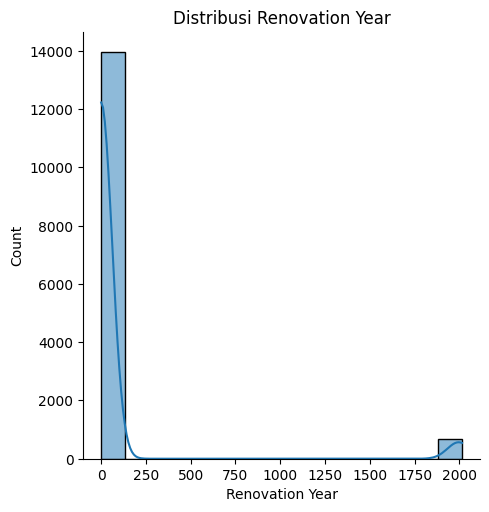

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


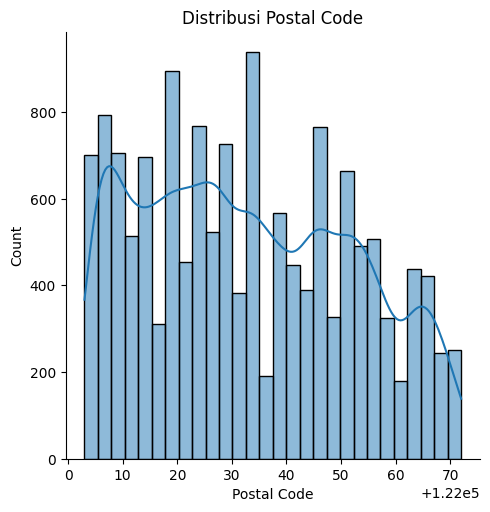

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


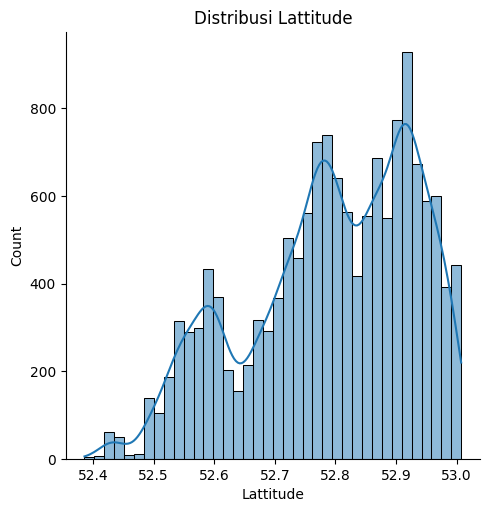

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


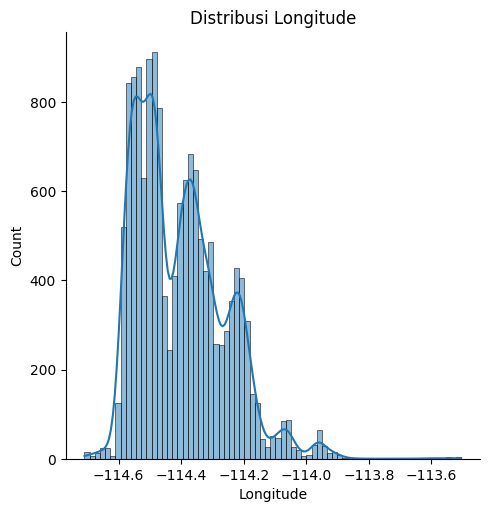

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


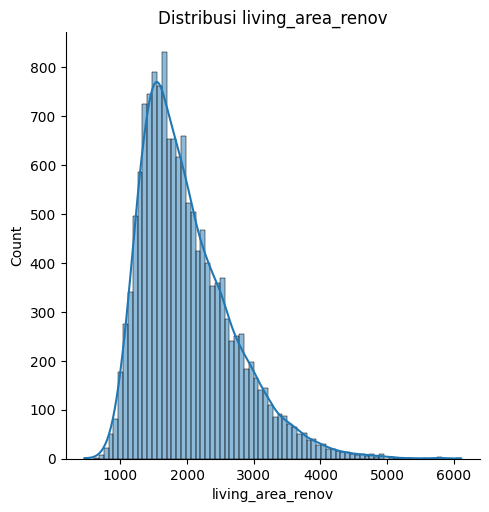

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


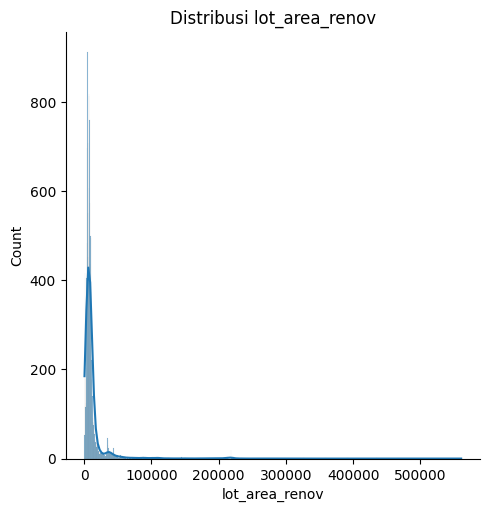

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


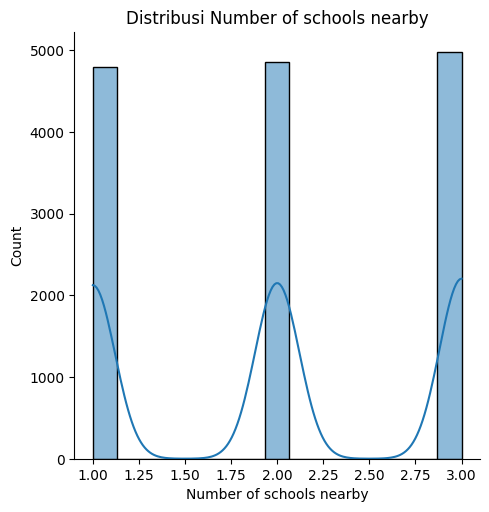

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


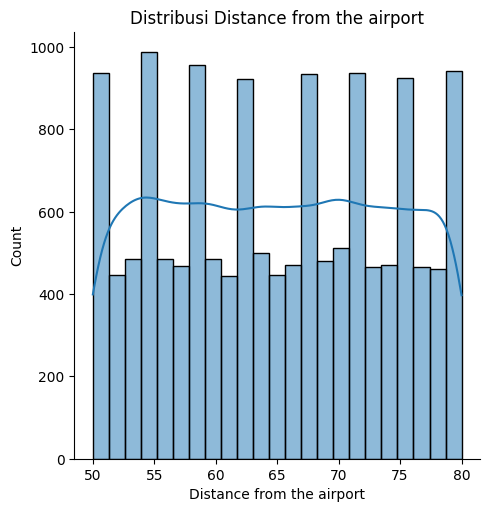

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


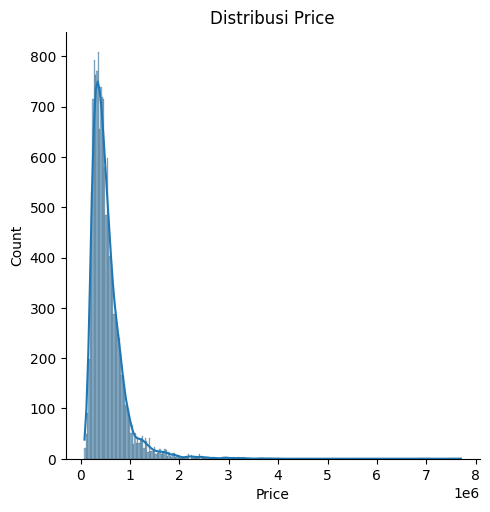

In [6]:
kolom_df = df.columns #Siapkan nama kolom yang akan di looping

for kolom in kolom_df: #buat loopingan untuk menentukan semua kolom yang akan dilooping pada variabel kolom
    sns.displot ( x = kolom, kde = True, data = df)
    plt.title(f"Distribusi {kolom}") #Gunakan 'f' sebagai function untuk mencetak
    plt.show()


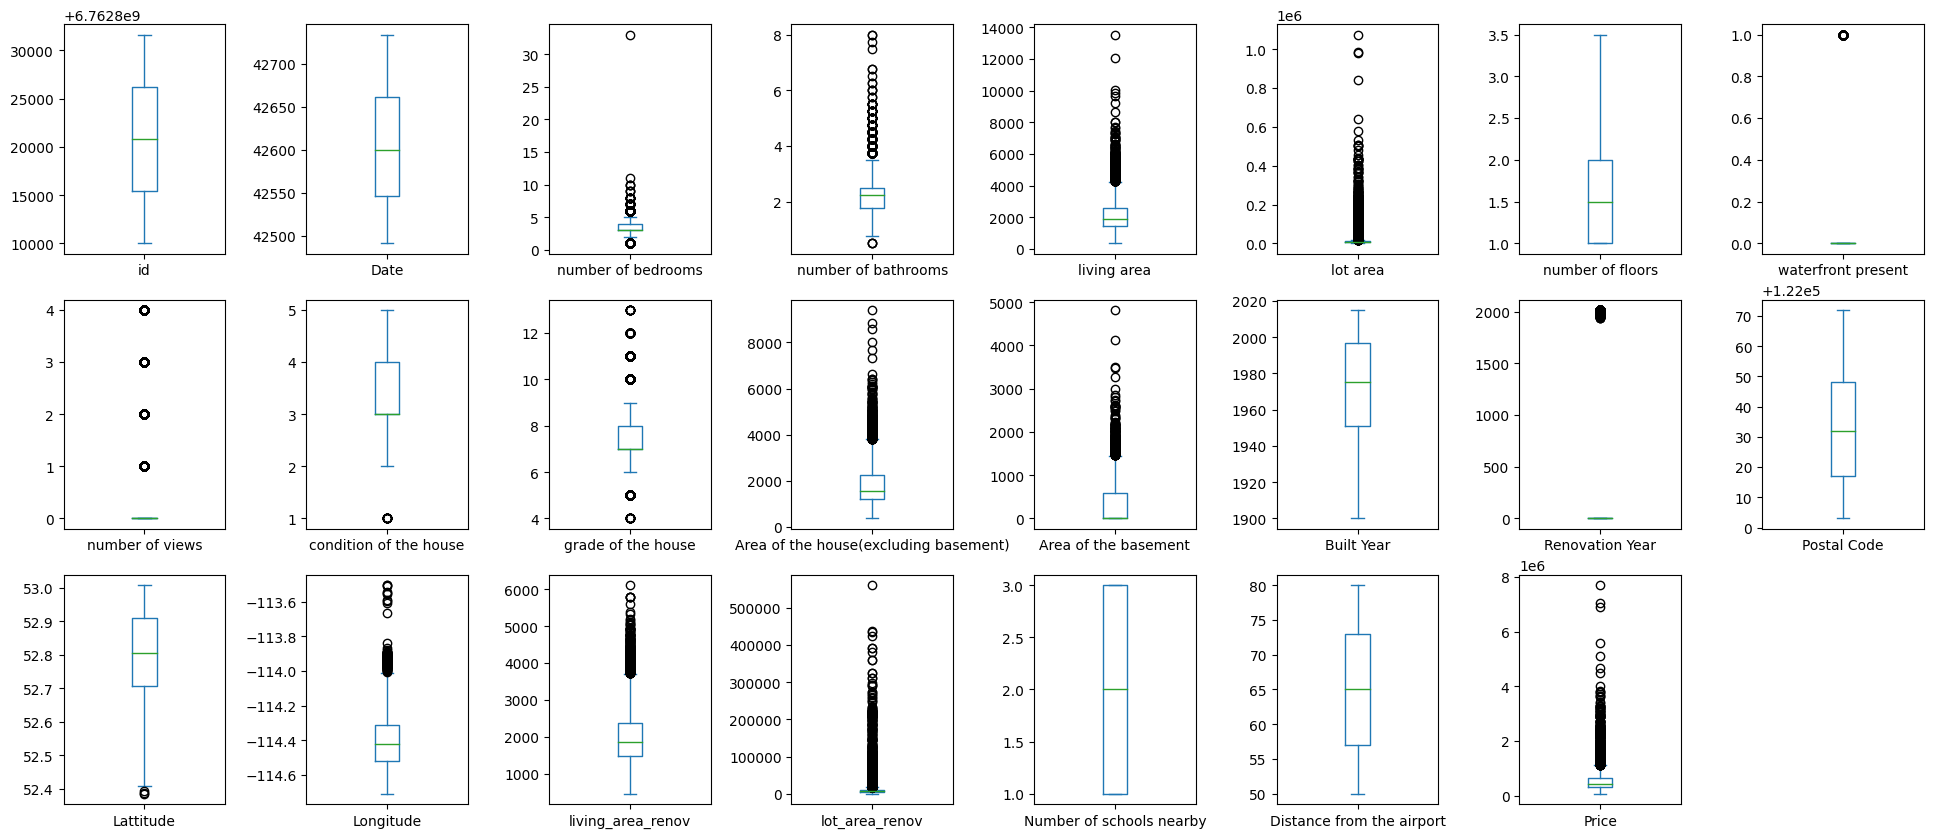

In [7]:
df.plot(subplots=True, layout=(8,8), kind='box', figsize=(24,28))
plt.subplots_adjust(wspace=0.5); 
plt.show()


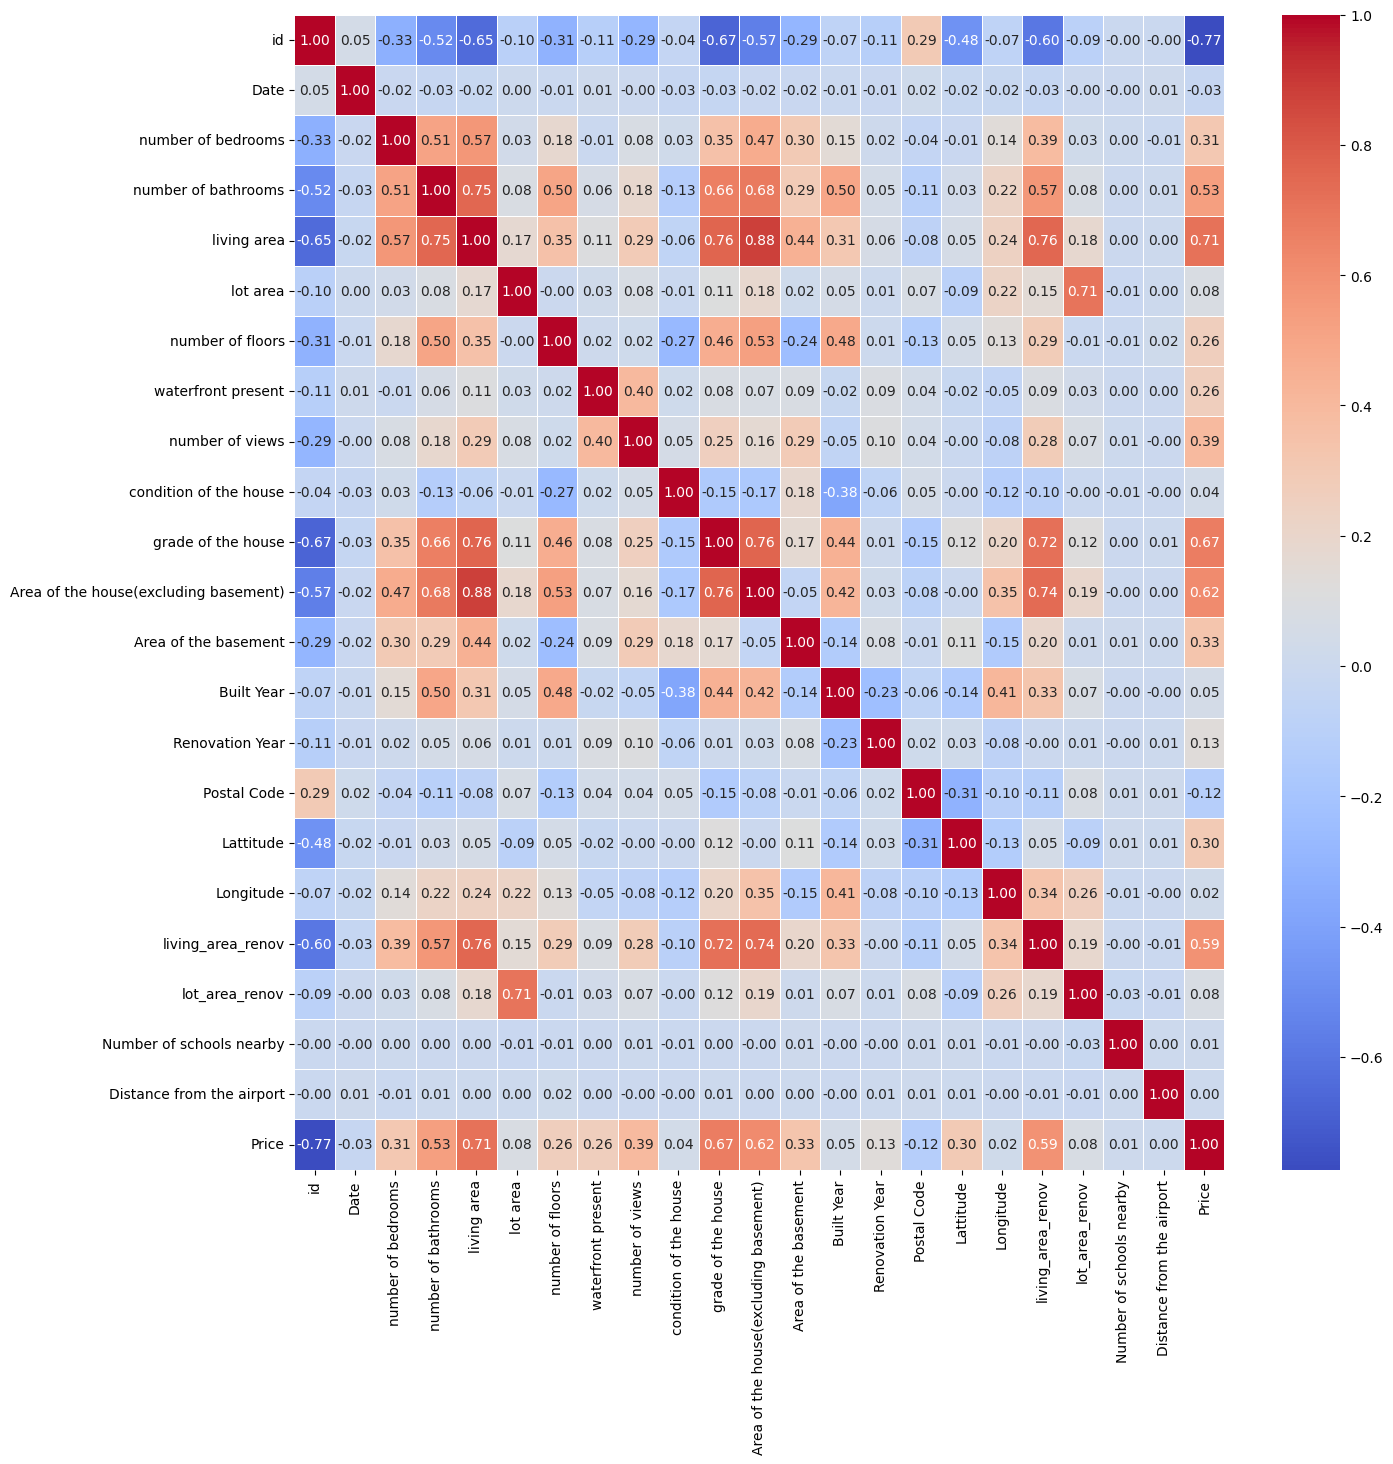

In [8]:
import matplotlib.pyplot as plt #korelasi hubungan antar variabel dapat dilihat dari korelasi di bawah
import seaborn as sns
plt.figure(figsize=(15,15))# bahwa Total_Phenols,Flavanoids, dan OD280 memliki pengaruh yang besar
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

In [9]:
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [10]:
df = df.drop(["id"], axis=1)

In [11]:
import scipy
from scipy import stats

kolom=len(df.columns)
z=[]
for i in range (0,kolom-1):
  k,y=stats.pearsonr(df.iloc[:,i],df.iloc[:,-1])
  z.append([i,df.columns[i], abs(k)])

z=sorted(z, key=lambda z:z[2], reverse=True)
z=pd.DataFrame(z,columns=["KolomKe","Nama Kolom","KoefisienKorelasi-Pearson"])
z

,KolomKe,Nama Kolom,KoefisienKorelasi-Pearson
0,3,living area,0.712276
1,9,grade of the house,0.671805
2,10,Area of the house(excluding basement),0.615179
3,17,living_area_renov,0.585021
4,2,number of bathrooms,0.532031
5,7,number of views,0.394954
6,11,Area of the basement,0.330499
7,1,number of bedrooms,0.308165
8,15,Lattitude,0.297570
9,6,waterfront present,0.263943


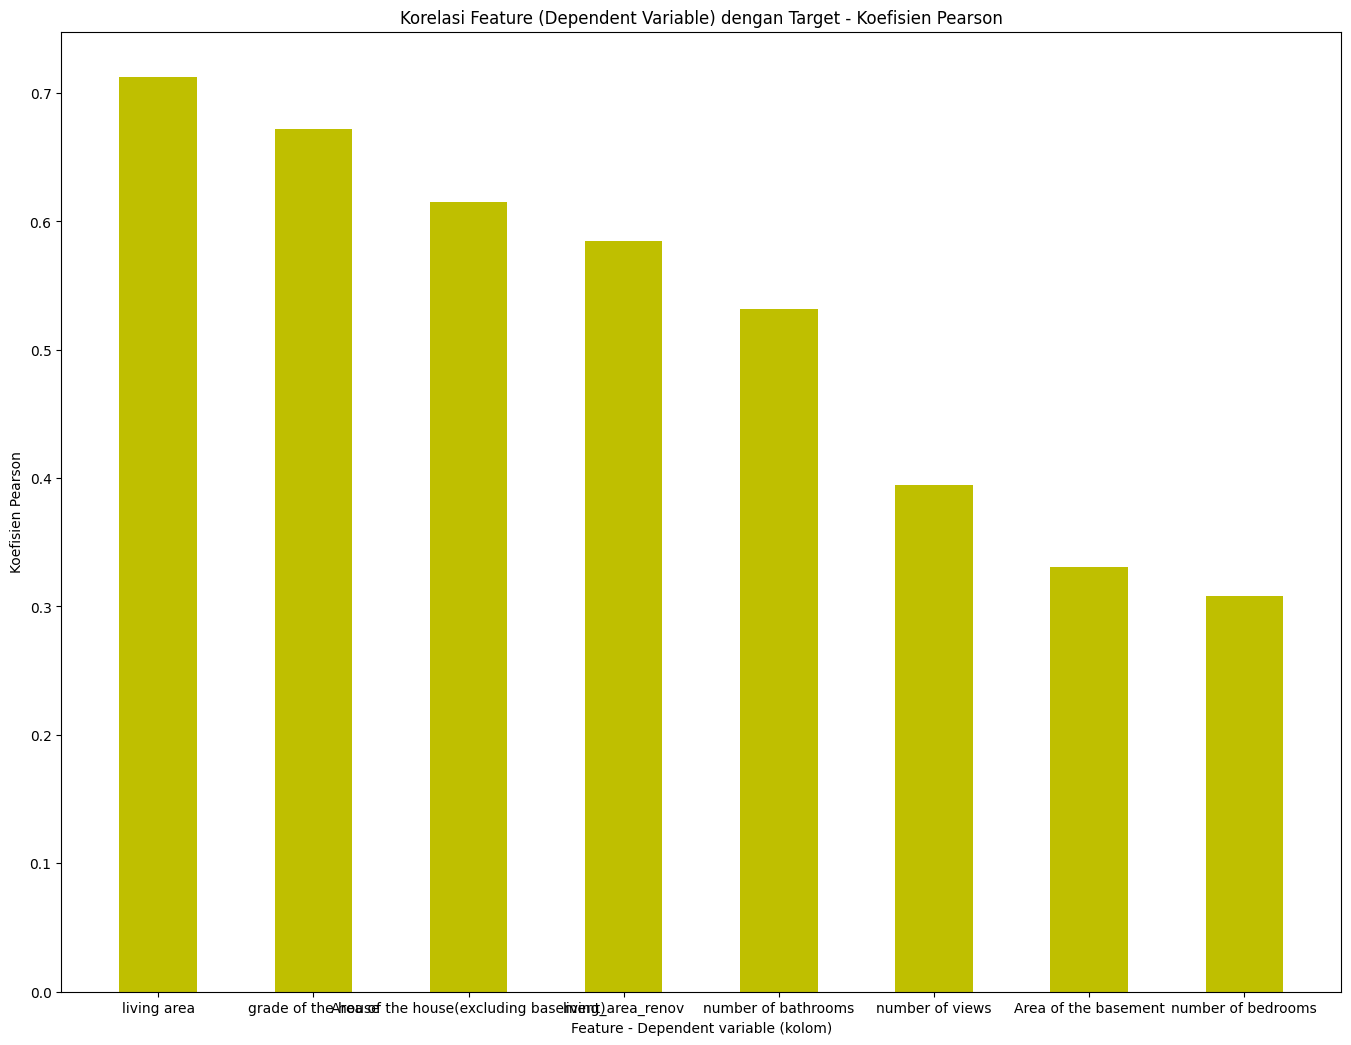

In [12]:
import matplotlib.pyplot as plt
g=z.head(8)
fig = plt.figure()

ax = fig.add_axes([1,1, 2, 2])
x_axis = g.iloc[:,1]
y_axis = g.iloc[:,2]

ax.bar(x_axis , y_axis, color = 'y', width = 0.5)

plt.title('Korelasi Feature (Dependent Variable) dengan Target - Koefisien Pearson')

plt.xlabel('Feature - Dependent variable (kolom)')
plt.ylabel('Koefisien Pearson')
plt.show()

In [13]:
df = df.rename(columns={'Lattitude': 'Lat'})
df = df.rename(columns={'Longitude': 'Lon'})

**JALANKAN CELL DI BAWAH JIKA ANDA INGIN MELIHAT PEMETAAN**


In [14]:
# import folium
# map = folium.Map(location=[df.Lat.mean(), df.Lon.mean()], zoom_start=14, control_scale=True)
# for index, location_info in df.iterrows():
#     folium.Marker([location_info["Lat"], location_info["Lon"]], popup=location_info["Address"]).add_to(map)
# map

In [15]:
df

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lat,Lon,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,42491,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,42734,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,42734,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,42734,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,42734,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=7)

**ALGORITMA LINEAR REGRESSION**

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [18]:
regressor.fit(x_train, y_train)
#Proses Prediksi
y_pred=regressor.predict(x_test)
print(y_pred)

[ 276817.11270739  351314.44823307  214966.96657969 ... 1023763.35180689
  440528.1037218   498621.86020112]


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

rmse=math.sqrt(mse)

In [20]:
print("Semakin kecil nilai MAE maka semakin baik kemampuan model dalam memprediksi data")
print("Hasil dari MAE XGBoost: ")
print("MAE (Mean Absolute Error): ",int(mae))

print("=================================================================================")

print("Semakin kecil nilai MSE maka semakin kecil kesalahan yang dihasilkan model")
print("Hasil dari MSE XGBoost: ")
print("MSE (Mean Squared Error): ",int(mse))

print("=================================================================================")

print("Semakin kecil nilainya maka menunjukan semakin kecil kesalahan rata rata dari prediksi model")
print("Hasil dari RMSE XGBoost: ")
print("RMSE (Root Mean Squared Error): ",int(rmse))

print("=================================================================================")

print("Coefficient of Determination")
print("Semakin Tinggi dan mendekati 1 makan semakin baik model")
print("R2 Score: ",r2)

Semakin kecil nilai MAE maka semakin baik kemampuan model dalam memprediksi data
Hasil dari MAE XGBoost: 
MAE (Mean Absolute Error):  122314
Semakin kecil nilai MSE maka semakin kecil kesalahan yang dihasilkan model
Hasil dari MSE XGBoost: 
MSE (Mean Squared Error):  41879385675
Semakin kecil nilainya maka menunjukan semakin kecil kesalahan rata rata dari prediksi model
Hasil dari RMSE XGBoost: 
RMSE (Root Mean Squared Error):  204644
Coefficient of Determination
Semakin Tinggi dan mendekati 1 makan semakin baik model
R2 Score:  0.6926670127632013


**ALGORITMA XGBoost**

In [21]:
import xgboost as xg
modelXG = xg.XGBRegressor(max_depth=3, learning_rate = 0.1, n_estimators=100)
modelXG.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
y_predXG = modelXG.predict(x_test)
#Evaluasi 
maeXGB = mean_absolute_error(y_test, y_predXG)
mseXGB=mean_squared_error(y_test, y_predXG)
r2XGB=r2_score(y_test, y_predXG)
rmseXGB=math.sqrt(mseXGB)

In [23]:
print("Semakin kecil nilai MAE maka semakin baik kemampuan model dalam memprediksi data")
print("Hasil dari MAE XGBoost: ")
print("MAE (Mean Absolute Error): ",int(maeXGB))

print("=================================================================================")

print("Semakin kecil nilai MSE maka semakin kecil kesalahan yang dihasilkan model")
print("Hasil dari MSE XGBoost: ")
print("MSE (Mean Squared Error): ",int(mseXGB))

print("=================================================================================")

print("Semakin kecil nilainya maka menunjukan semakin kecil kesalahan rata rata dari prediksi model")
print("Hasil dari RMSE XGBoost: ")
print("RMSE (Root Mean Squared Error): ",int(rmseXGB))

print("=================================================================================")

print("Coefficient of Determination")
print("Semakin Tinggi dan mendekati 1 makan semakin baik model")
print("R2 Score: ",r2XGB)

Semakin kecil nilai MAE maka semakin baik kemampuan model dalam memprediksi data
Hasil dari MAE XGBoost: 
MAE (Mean Absolute Error):  73620
Semakin kecil nilai MSE maka semakin kecil kesalahan yang dihasilkan model
Hasil dari MSE XGBoost: 
MSE (Mean Squared Error):  19292742617
Semakin kecil nilainya maka menunjukan semakin kecil kesalahan rata rata dari prediksi model
Hasil dari RMSE XGBoost: 
RMSE (Root Mean Squared Error):  138898
Coefficient of Determination
Semakin Tinggi dan mendekati 1 makan semakin baik model
R2 Score:  0.8584196944404874


**ALGORITMA DECISION TREE REGRESOR**

In [24]:
from sklearn.tree import DecisionTreeRegressor
modelDT = DecisionTreeRegressor()
modelDT.fit(x_train, y_train)

DecisionTreeRegressor()

In [25]:
y_predDT = modelDT.predict(x_test)
y_predDT

array([430000., 405000., 285950., ..., 950000., 943500., 550000.])

In [26]:
#Evaluasi 
maeDT = mean_absolute_error(y_test, y_predDT)
mseDT=mean_squared_error(y_test, y_predDT)
r2DT=r2_score(y_test, y_predDT)
rmseDT=math.sqrt(mseDT)

In [27]:
print("Semakin kecil nilai MAE maka semakin baik kemampuan model dalam memprediksi data")
print("Hasil dari MAE XGBoost: ")
print("MAE (Mean Absolute Error): ",int(maeDT))

print("=================================================================================")

print("Semakin kecil nilai MSE maka semakin kecil kesalahan yang dihasilkan model")
print("Hasil dari MSE XGBoost: ")
print("MSE (Mean Squared Error): ",int(mseDT))

print("=================================================================================")

print("Semakin kecil nilainya maka menunjukan semakin kecil kesalahan rata rata dari prediksi model")
print("Hasil dari RMSE XGBoost: ")
print("RMSE (Root Mean Squared Error): ",int(rmseDT))

print("=================================================================================")

print("Coefficient of Determination")
print("Semakin Tinggi dan mendekati 1 makan semakin baik model")
print("R2 Score: ",r2DT)

Semakin kecil nilai MAE maka semakin baik kemampuan model dalam memprediksi data
Hasil dari MAE XGBoost: 
MAE (Mean Absolute Error):  97344
Semakin kecil nilai MSE maka semakin kecil kesalahan yang dihasilkan model
Hasil dari MSE XGBoost: 
MSE (Mean Squared Error):  31861279147
Semakin kecil nilainya maka menunjukan semakin kecil kesalahan rata rata dari prediksi model
Hasil dari RMSE XGBoost: 
RMSE (Root Mean Squared Error):  178497
Coefficient of Determination
Semakin Tinggi dan mendekati 1 makan semakin baik model
R2 Score:  0.7661851543533919


In [28]:
jawaban = pd.DataFrame({'Jawaban Asli':(y_test).reset_index(drop=True)})
jawaban

,Jawaban Asli
0,280000
1,432000
2,250000
3,300000
4,790000
...,...
2919,257200
2920,159000
2921,810000
2922,495000


In [29]:
predLinear = pd.DataFrame({'pred Linear Regresion':(y_pred)})
predLinear

,pred Linear Regresion
0,2.768171e+05
1,3.513144e+05
2,2.149670e+05
3,2.972312e+05
4,7.288232e+05
...,...
2919,3.227537e+05
2920,2.021349e+05
2921,1.023763e+06
2922,4.405281e+05


In [30]:
predXGB = pd.DataFrame({'pred XGBoost':(y_predXG)})
predXGB

,pred XGBoost
0,389451.781250
1,378247.312500
2,247591.156250
3,312996.562500
4,739628.125000
...,...
2919,231101.921875
2920,204434.734375
2921,882246.812500
2922,542000.625000


In [31]:
predDT = pd.DataFrame({'pred Decision Regresor':(y_predDT)})
predDT

,pred Decision Regresor
0,430000.0
1,405000.0
2,285950.0
3,302000.0
4,690000.0
...,...
2919,253000.0
2920,224000.0
2921,950000.0
2922,943500.0


In [32]:
df_result=pd.concat([jawaban,predLinear,predXGB,predDT], axis=1)
df_result

,Jawaban Asli,pred Linear Regresion,pred XGBoost,pred Decision Regresor
0,280000,2.768171e+05,389451.781250,430000.0
1,432000,3.513144e+05,378247.312500,405000.0
2,250000,2.149670e+05,247591.156250,285950.0
3,300000,2.972312e+05,312996.562500,302000.0
4,790000,7.288232e+05,739628.125000,690000.0
...,...,...,...,...
2919,257200,3.227537e+05,231101.921875,253000.0
2920,159000,2.021349e+05,204434.734375,224000.0
2921,810000,1.023763e+06,882246.812500,950000.0
2922,495000,4.405281e+05,542000.625000,943500.0


In [33]:
import plotly.express as px
fig=px.line(df_result[['Jawaban Asli','pred Linear Regresion']])
fig.show()
print("R2 Score Linear Regresion: ",r2)

R2 Score Linear Regresion:  0.6926670127632013


In [34]:
import plotly.express as px
fig=px.line(df_result[['Jawaban Asli','pred XGBoost']])
fig.show()
print("R2 Score XGBoost: ",r2XGB)

R2 Score XGBoost:  0.8584196944404874


In [35]:
import plotly.express as px
fig=px.line(df_result[['Jawaban Asli','pred Decision Regresor']])
fig.show()
print("R2 Score Decision Regresor: ",r2DT)

R2 Score Decision Regresor:  0.7661851543533919
